<a href="https://colab.research.google.com/github/lacakp/Project-Fruit-Image-Classification/blob/main/Proj_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction


Hi I'm lacakp : )
github: https://github.com/lacakp

- Classification Apple Banana and Tomato

- Transfer Learning Using Keras -- MobileNetv2 :
Efficient Convolutional Neural Networks for Mobile Vision Applications

- Transfer Learning คือ เทคนิคที่ช่วยลดเวลาการเทรนโมเดล Deep Learning ด้วยการนำบางส่วนของโมเดลที่เทรนเรียบร้อยแล้ว กับงานที่ใกล้เคียงกัน มาใช้เป็นส่วนหนึ่งของโมเดลใหม่

- MobileNet คืออะไร : Keng Surapong 2020-01-12 
- https://www.bualabs.com/archives/3439/tensorflow-js-tutorial-build-image-classification-javascript-mobilenet-pretrained-model-tfjs-ep-7/
- Transfer Learning คืออะไร : Keng Surapong 2020-01-14
- https://www.bualabs.com/archives/3493/what-is-transfer-learning-build-headless-mobilenet-model-transfer-learning-machine-learning-mobilenet-json-retrain-webcam-tensorflow-js-tfjs-ep-10/
- Neural Network Programming : โดย ชิตพงษ์ กิตตินราดร | มกราคม 2563
- https://guopai.github.io/ml-blog15.html
- 3 วิธีในการสร้างโมเดล Machine Learning ด้วย Keras และ TensorFlow 2.0 : ICHI.PRO
- https://ichi.pro/th/3-withi-ni-kar-srang-model-machine-learning-dwy-keras-laea-tensorflow-2-0-244131078796499

## Prepare Colab + kaggle (simple version)

In [ ]:
# https://www.analyticsvidhya.com/blog/2021/06/how-to-load-kaggle-datasets-directly-into-google-colab/
# https://www.kaggle.com/moltean/fruits
# https://www.kaggle.com/sshikamaru/fruit-recognition

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 1. Install the Kaggle library
! pip install kaggle

In [ ]:
# 2. Make a directory named “.kaggle”
!mkdir kaggle

In [ ]:
# 3. Copy the “kaggle.json” into this new directory # 4. Allocate the required permission for this file.
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json
# ! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Downloading Competitions dataset:
! kaggle datasets download -d moltean/fruits/fruits-360_dataset

100% 1.28G/1.28G [00:08<00:00, 151MB/s]
100% 1.28G/1.28G [00:08<00:00, 163MB/s]


In [ ]:
# # Create a directory named train,
# ! mkdir train
# # unzip train data there,
# ! unzip fruits.zip -d train
# unzip train data there,

 unzip fruits.zip
! ls

## Prepare Colab + kaggle (use kora)

In [ ]:
# https://medium.com/super-ai-engineer/kora-%E0%B9%80%E0%B8%84%E0%B8%A3%E0%B8%B7%E0%B9%88%E0%B8%AD%E0%B8%87%E0%B8%A1%E0%B8%B7%E0%B8%AD%E0%B8%94%E0%B8%B5-%E0%B9%86-%E0%B8%AA%E0%B8%B3%E0%B8%AB%E0%B8%A3%E0%B8%B1%E0%B8%9A%E0%B8%84%E0%B8%99%E0%B8%A3%E0%B8%B1%E0%B8%81-google-colab-137c193641c0
!pip install -q kora # https://github.com/korakot/kora

     |████████████████████████████████| 57 kB 2.4 MB/s 
     |████████████████████████████████| 56 kB 3.7 MB/s 


In [ ]:
from kora import kaggle
kaggle.search('moltean/fruits')

,ref,title,size,lastUpdated,downloadCount
0,prasunroy/natural-images,Natural Images,342MB,2018-08-11 18:24:11,15718
1,moltean/fruits,Fruits 360,1GB,2021-09-12 19:19:48,76754
2,souro12/ccxzvv,Fruits Images - 5 classes,15MB,2020-04-01 09:49:55,89
3,ztaihong/fruits360v14,fruits360v14,175MB,2019-10-02 06:09:08,80
4,manaralkali/citris,citris,10MB,2021-02-19 21:26:45,0
5,ztaihong/fruits360v14npz,fruits360v14npz,1GB,2019-10-08 03:04:59,31
6,mdhasibulhuq/ai-face-with-mask-without-mask-an...,"AI Face with Mask, without mask and non huma",4GB,2020-11-16 06:41:55,41


In [ ]:
kaggle.download('moltean/fruits')

 99% 1.28G/1.28G [00:32<00:00, 61.4MB/s]
100% 1.28G/1.28G [00:33<00:00, 41.7MB/s]


#Pipeline
1. Data Acquisition
2. Training The Model
3. Evaluation
4. Prediction
5. Deploy Model

## Data Acquisition

### Check Data

In [ ]:
import os
import numpy as np
import pandas as pd
import cv2 as cv 
from google.colab.patches import cv2_imshow
import random

In [ ]:
!ls 'fruits-360_dataset/fruits-360/Training'
train_path = 'fruits-360_dataset/fruits-360/Training'

'Apple Braeburn'       'Grape Blue'	     'Pear Monster'
'Apple Crimson Snow'   'Grapefruit Pink'     'Pear Red'
'Apple Golden 1'       'Grapefruit White'    'Pear Stone'
'Apple Golden 2'       'Grape Pink'	     'Pear Williams'
'Apple Golden 3'       'Grape White'	      Pepino
'Apple Granny Smith'   'Grape White 2'	     'Pepper Green'
'Apple Pink Lady'      'Grape White 3'	     'Pepper Orange'
'Apple Red 1'	       'Grape White 4'	     'Pepper Red'
'Apple Red 2'	        Guava		     'Pepper Yellow'
'Apple Red 3'	        Hazelnut	      Physalis
'Apple Red Delicious'   Huckleberry	     'Physalis with Husk'
'Apple Red Yellow 1'    Kaki		      Pineapple
'Apple Red Yellow 2'    Kiwi		     'Pineapple Mini'
 Apricot	        Kohlrabi	     'Pitahaya Red'
 Avocado	        Kumquats	      Plum
'Avocado ripe'	        Lemon		     'Plum 2'
 Banana		       'Lemon Meyer'	     'Plum 3'
'Banana Lady Finger'    Limes		      Pomegranate
'Banana Red'	        Lychee		     'Pomelo Sweetie'
 Beetroot	        Mand

In [ ]:
# ฟังก์ชันสำหรับโหลดภาพเข้ามา
def load_images_from_folder(folder):
    images = [] # สร้าง list สำหรับเก็บภาพ 
    for filename in os.listdir(folder): # ลูปดูภาพใน folder 
        img = cv.imread(os.path.join(folder,filename))  # ทำการอ่านภาพจาก ชื่อภาพ โดย cv.imread เก็บไว้ img 
        if img is not None: # เช็คดูว่าถ้าไม่ได้เป็นค่าว่าง 
            images.append(img) # ให้เก็บไว้ใน list images
    return images # คืนค่าเป็น list Images

In [ ]:
apple_train = 'fruits-360_dataset/fruits-360/Training/Apple Red 1/' # path Apple images
banana_train = 'fruits-360_dataset/fruits-360/Training/Banana/'     # path banana images
tomato_train = 'fruits-360_dataset/fruits-360/Training/Tomato 1/'   # path tomato images
# ทำการโหลดภาพทุกภาพแล้ว แปลงเป็น array โดย ใช้ฟังก์ชันที่เตรียมไว้ คือ load_images_from_folder 
apple_img = load_images_from_folder(apple_train)  # โหลดภาพ แอปเปิ้ลมา
banana_img = load_images_from_folder(banana_train)  # โหลดภาพ กล้วยมา
tomato_img = load_images_from_folder(tomato_train)  # โหลดภาพ มะเขือเทศมา
# เช็คดูจำนวนภาพ
print("ภาพกล้วยมีอยู่ " + str(len(banana_img)) + " ภาพ")
print("ภาพแอปเปิ้ลมีอยู่ " + str(len(apple_img)) + " ภาพ")
print("ภาพแอปเปิ้ลมีอยู่ " + str(len(tomato_img)) + " ภาพ")

ภาพกล้วยมีอยู่ 490 ภาพ
ภาพแอปเปิ้ลมีอยู่ 492 ภาพ
ภาพแอปเปิ้ลมีอยู่ 738 ภาพ


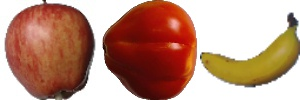

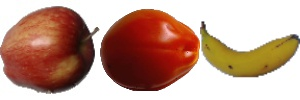

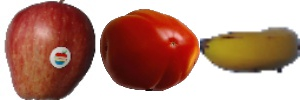

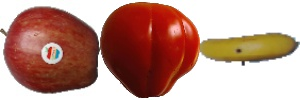

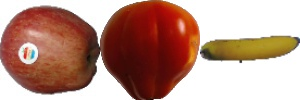

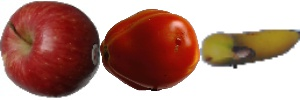

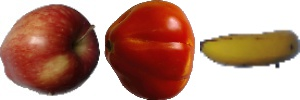

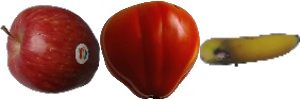

In [ ]:
# สุ่มมาดูสัก 8 ภาพ
for i in range(8):   
  ran = random.randint(1,489)   # สุ่มโดย พิศัยตัวเลข จาก 1 ถึง 489 ภาพ
  final_frame = cv.hconcat((apple_img[ran], tomato_img[ran], banana_img[ran])) # แสดงภาพ
  cv2_imshow(final_frame) # โชว์ภาพ

### Preparing Data

- เช็คดูข้อมูลใน dataset

In [ ]:
!ls 'fruits-360_dataset/fruits-360/Training'
train_path = 'fruits-360_dataset/fruits-360/Training'

'Apple Braeburn'       'Grape Blue'	     'Pear Monster'
'Apple Crimson Snow'   'Grapefruit Pink'     'Pear Red'
'Apple Golden 1'       'Grapefruit White'    'Pear Stone'
'Apple Golden 2'       'Grape Pink'	     'Pear Williams'
'Apple Golden 3'       'Grape White'	      Pepino
'Apple Granny Smith'   'Grape White 2'	     'Pepper Green'
'Apple Pink Lady'      'Grape White 3'	     'Pepper Orange'
'Apple Red 1'	       'Grape White 4'	     'Pepper Red'
'Apple Red 2'	        Guava		     'Pepper Yellow'
'Apple Red 3'	        Hazelnut	      Physalis
'Apple Red Delicious'   Huckleberry	     'Physalis with Husk'
'Apple Red Yellow 1'    Kaki		      Pineapple
'Apple Red Yellow 2'    Kiwi		     'Pineapple Mini'
 Apricot	        Kohlrabi	     'Pitahaya Red'
 Avocado	        Kumquats	      Plum
'Avocado ripe'	        Lemon		     'Plum 2'
 Banana		       'Lemon Meyer'	     'Plum 3'
'Banana Lady Finger'    Limes		      Pomegranate
'Banana Red'	        Lychee		     'Pomelo Sweetie'
 Beetroot	        Mand

- สร้างโฟลเดอร์ไว้สำหรับ เก็บภาพ apple tomato และ banana ซึ่งเป็นภาพที่เราสนใจ

In [ ]:
import os
!pwd
# Create Folder
try:
  os.mkdir('Train')
  os.mkdir('/content/Train/Apple')
  os.mkdir('/content/Train/Tomato')
  os.mkdir('/content/Train/Banana')
except:
  pass
  
!ls

/content
drive  fruits-360_dataset  fruits-360-original-size  sample_data  Train


- ทำการย้าย ภาพจาก dataset เดิมไปที่ folder train เพื่อให้ง่ายต่อการเทรน เพราะเราจะใช้ label ชนิด catagories ที่เป็นชื่อ folder ของ Apple Banana และ Tomato ในโฟลเดอร์ Train

In [ ]:
# copy file to /content/Train/
try:
  # Apple
  !cp -r '/content/fruits-360_dataset/fruits-360/Training/Apple Red 1/' '/content/Train/Apple'
  !cp -r '/content/fruits-360_dataset/fruits-360/Training/Apple Red 2/' '/content/Train/Apple'
  !cp -r '/content/fruits-360_dataset/fruits-360/Training/Apple Red 3/' '/content/Train/Apple'
  !cp -r '/content/fruits-360_dataset/fruits-360/Training/Apple Red Delicious/' '/content/Train/Apple'
  !cp -r '/content/fruits-360_dataset/fruits-360/Training/Apple Braeburn/' '/content/Train/Apple'
  !cp -r '/content/fruits-360_dataset/fruits-360/Training/Apple Crimson Snow/' '/content/Train/Apple'
  !cp -r '/content/fruits-360_dataset/fruits-360/Training/Apple Golden 1/' '/content/Train/Apple'
  # Banana
  !cp -r 'fruits-360_dataset/fruits-360/Training/Banana/' '/content/Train/Banana'
  !cp -r 'fruits-360_dataset/fruits-360/Training/Banana Lady Finger/' '/content/Train/Banana'
  !cp -r 'fruits-360_dataset/fruits-360/Training/Banana Red/' '/content/Train/Banana'
  # Tomato
  !cp -r 'fruits-360_dataset/fruits-360/Training/Tomato 1/' '/content/Train/Tomato'
  !cp -r 'fruits-360_dataset/fruits-360/Training/Tomato 2/' '/content/Train/Tomato'
  !cp -r 'fruits-360_dataset/fruits-360/Training/Tomato 3/' '/content/Train/Tomato'
  !cp -r 'fruits-360_dataset/fruits-360/Training/Tomato 4/' '/content/Train/Tomato'
  !cp -r 'fruits-360_dataset/fruits-360/Training/Tomato Maroon/' '/content/Train/Tomato'
except:
  pass

- ทำการลบ ข้อมูลเดิมออก

In [ ]:
import shutil
try:
  shutil.rmtree('/content/fruits-360-original-size')
  shutil.rmtree('/content/fruits-360_dataset')
except:
  pass

## Split - Train data and validation data

- เตรียม library ต่างๆที่จำเป็น ต้องใช้ในการ Train model

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import os

- กำหนด shape ของภาพเป็น 224x224


In [ ]:
height = 224
width = 224
batch_size = 32
data_dir = '/content/Train'

- ดึงข้อมูลจาก path data_dir ซึ่งคือ โฟลเดอร์ Train เพื่อทำการแบ่งเป็น training set

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split = 0.3,
    subset = 'training',
    seed = 123,
    image_size = (height, width),
    batch_size = batch_size
)

Found 7743 files belonging to 3 classes.
Using 5421 files for training.


- ดึงข้อมูลจาก path data_dir ซึ่งคือ โฟลเดอร์ Train เพื่อทำการแบ่งเป็น validation set

In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split = 0.3,
    subset = 'validation',
    seed = 123,
    image_size = (height, width),
    batch_size = batch_size
)

Found 7743 files belonging to 3 classes.
Using 2322 files for validation.


- เช็คดู class_names

In [ ]:
classes = train_ds.class_names
print(classes)
print(train_ds)

['Apple', 'Banana', 'Tomato']
<BatchDataset shapes: ((None, 224, 224, 3), (None,)), types: (tf.float32, tf.int32)>


## Training The Model

### MobileNetv2

- Document - MobileNetv2 model
- https://keras.io/api/applications/mobilenet/


- Load Model

In [ ]:
from tensorflow.keras.applications import MobileNetV2
model = MobileNetV2(weights = 'imagenet')

14548992/14536120 [==============================] - 0s 0us/step


In [ ]:
model.compile(optimizer='adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
_______________________________________________________________________________

### Train
https://keras.rstudio.com/reference/fit.html#arguments

validation_data	
Data on which to evaluate the loss and any model metrics at the end of each epoch. The model will not be trained on this data. This could be a list (x_val, y_val) or a list (x_val, y_val, val_sample_weights). validation_data will override validation_split.


- หมายถึง ข้อมูลการตรวจสอบ ประเมินค่า loss และ model metrics เมื่อจบ epoch


epochs
Number of epochs to train the model. Note that in conjunction with initial_epoch, epochs is to be understood as "final epoch". The model is not trained for a number of iterations given by epochs, but merely until the epoch of index epochs is reached.

- epochs	คือ จำนวนครั้งในการฝึกโมเดล

In [ ]:
# train 5 ครั้ง
epochs = 5
ABTFruit = model.fit(train_ds,
                     validation_data=val_ds, 
                     epochs=epochs
                     )

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


170/170 [==============================] - 105s 395ms/step - loss: 0.0864 - accuracy: 0.9862 - val_loss: 0.6155 - val_accuracy: 0.8514
Epoch 2/5
170/170 [==============================] - 65s 382ms/step - loss: 0.0024 - accuracy: 0.9993 - val_loss: 1.1227 - val_accuracy: 0.9048
Epoch 3/5
170/170 [==============================] - 65s 383ms/step - loss: 1.4688e-04 - accuracy: 1.0000 - val_loss: 0.0265 - val_accuracy: 0.9922
Epoch 4/5
170/170 [==============================] - 66s 384ms/step - loss: 1.2495e-04 - accuracy: 1.0000 - val_loss: 0.0058 - val_accuracy: 0.9983
Epoch 5/5
170/170 [==============================] - 65s 383ms/step - loss: 1.6571e-05 - accuracy: 1.0000 - val_loss: 0.0010 - val_accuracy: 0.9996


## Evaluation

- Evaluation model ทำการพล็อตกราฟดูค่าความถูกต้องและค่าความผิดพลาด acc/loss

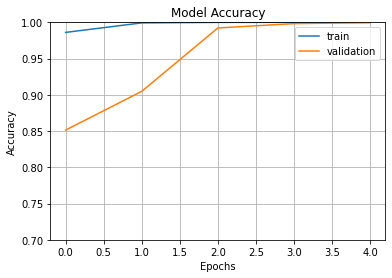

In [ ]:
# Model Accuracy
fig1 = plt.gcf()

plt.plot(ABTFruit.history['accuracy'])
plt.plot(ABTFruit.history['val_accuracy'])
plt.axis(ymin=0.7, ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

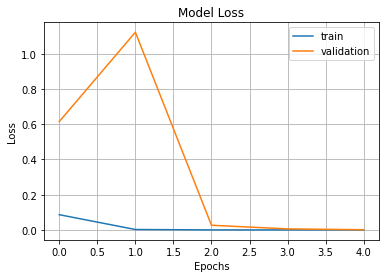

In [ ]:
# Model Loss
plt.plot(ABTFruit.history['loss'])
plt.plot(ABTFruit.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

## Prediction

- ทำการนำโมลที่เทรนได้มาใช้ มาทำนายจากภาพ โดยใช้การอัพโหลดภาพ

In [ ]:
# for upload image
from google.colab import files
uploaded = files.upload()

Saving Image_apple.jpg to Image_apple.jpg


- ดึง keys ของไฟล์ภาพที่อัพโหลดขึ้นล่าสุดแล้วทำการอ่านภาพมา

dict_keys(['Image_apple.jpg'])
ภาพที่อัพโหลดขึ้นมาคือ Image_apple.jpg


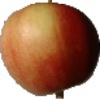

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
print(uploaded.keys())
print("ภาพที่อัพโหลดขึ้นมาคือ", list(uploaded)[0])
upload_img = list(uploaded)[0]
image = cv2.imread(upload_img)
# print(image)
cv2_imshow(image)

- แปลงภาพที่อัปโหลดมา เป็น shape 200

In [ ]:
img = cv2.resize(image, (224, 224), interpolation=cv2.INTER_AREA)
img = np.expand_dims(img, axis=0)
print(img.shape)

(1, 224, 224, 3)


- ทำนายโดยใช้โมเดล ผลลัพธ์เป็น array

In [ ]:
pred = model.predict(img)
print(pred)

[[1.00000000e+00 6.80388298e-12 2.85223469e-16 7.93181745e-20
  1.07896883e-19 2.45294103e-18 4.29392558e-18 6.29381255e-19
  5.04859066e-17 1.14460786e-17 8.64031592e-18 1.83341638e-17
  6.56595963e-19 7.46944507e-18 1.56671515e-17 3.50107404e-17
  9.31042568e-18 2.47589964e-17 3.18416692e-17 5.57180175e-18
  7.23306166e-19 3.41821105e-17 3.40496260e-17 1.03243134e-17
  1.88416048e-18 9.78392868e-18 7.10668005e-18 8.10346081e-18
  6.66379307e-18 4.90995883e-17 8.83227327e-17 1.49448541e-17
  5.89171179e-18 1.99450844e-18 3.01022543e-18 1.01116155e-17
  6.97369174e-18 1.11565613e-17 3.36671712e-18 1.76562157e-18
  2.07980772e-18 7.68582052e-19 2.31393499e-18 2.35252830e-17
  1.10874845e-18 9.49648425e-18 1.76095337e-18 1.57482235e-17
  1.68807545e-17 1.11603860e-18 5.96245765e-18 2.90996308e-18
  9.41438554e-19 3.27699325e-18 6.34574419e-18 1.26367297e-18
  4.58379655e-19 8.05863134e-20 6.50914990e-19 1.70497206e-18
  3.12987628e-18 4.15274405e-18 3.64986952e-18 1.70732246e-17
  5.5921

- ผลลัพธ์ที่ได้จากการทำนาย โดยให้ output เป็นชื่อคลาส

In [ ]:
output_class = classes[np.argmax(pred)]
print("This is ", output_class)

This is  Apple


## Deploy Model

- ทำการ save model เป็นไฟล์ โมเดล .h5 

In [ ]:
model.save('AppleBananaTomato', save_format='h5')

/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [ ]:
test_load_model = tf.keras.models.load_model('/content/AppleBananaTomato')

- โหลดภาพมาใหม่

Saving banana.jpg to banana.jpg
ภาพที่อัพโหลดขึ้นมาคือ banana.jpg


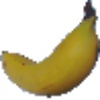

(100, 100, 3)


In [ ]:
import cv2
from google.colab.patches import cv2_imshow
from google.colab import files
uploaded = files.upload() # อัปโหลดไฟล์
print("ภาพที่อัพโหลดขึ้นมาคือ", list(uploaded)[0]) # แสดงชื่อไฟล์ภาพ
image = cv2.imread( list(uploaded)[0] ) # อ่านไฟล์ภาพ
cv2_imshow(image) # แสดงภาพ
print(image.shape)

- แปลง shape ภาพ

In [ ]:
try:
  image = cv2.resize(image, (224, 224), interpolation=cv2.INTER_AREA) # ทำการแปลง  shape ภาพโดย interpolation  cv2.INTER_AREA
  img = np.expand_dims(image, axis=0) # expand dimentional axis = 0
  print(img.shape) # แสดงข้อมูล shape ภาพ
except:
  pass

(1, 224, 224, 3)


In [ ]:
pred = test_load_model.predict(img)
print(type(pred))

<class 'numpy.ndarray'>


In [ ]:
output_class = classes[np.argmax(pred)]
print("This is ", output_class)

This is  Banana
